# Submission 1


Melakukan import library yang digunakan dalam proyek

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Melbourne Housing Snapshot.csv to Melbourne Housing Snapshot (1).csv


Tahap selanjutnya,
membaca data dan menampilkan sampel minimal 5 data serta mengetahui type dari masing-masing data dan jumlah missing value

In [35]:
df = pd.read_csv("Melbourne Housing Snapshot.csv")

print("\nContoh Data : ")
print(df.head())

print("\nInfo Data :")
print(df.info())

print("\nJumlah Baris & Kolom :")
print(df.shape)

print("\nDeskripsi Data : ")
print(df.describe())

print("\nTipe Data : ")
print(df.dtypes)

print("\nMissing Value : ")
print(df.isnull().sum())


Contoh Data : 
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regi

Hasil :
1. Untuk jumlah data, saya memiliki 5 baris x 12 kolom
2. Type data yang dimiliki yaitu : float64(12), int64(1), object(8)
3. Adapun missing value ditemukan pada kolom : Car, BuildingArea, YearBuilt, dan CouncilArea.

Dari data yang tertera diatas, karena adanya missing values pada data maka akan di lakukan permberihan pada data.

## Persiapan Data Yang Akan Digunakan

In [21]:
df.drop_duplicates(inplace=True)

Mengapus data duplikat

In [22]:
df.dropna(subset=['CouncilArea'], inplace=True)

Menghapus kolom CoouncilArea

In [23]:
df = df[df['BuildingArea'].notnull() & df['Car'].notnull()]

Menghapus baris missing value pada kolom Building dan Car

In [24]:
median_year = df['YearBuilt'].median()
df.loc[:,'YearBuilt'] = df['YearBuilt'].fillna(median_year)

Mengisi nilai kosng dengan median pada kolom YearBuilt

In [25]:
print("\nMissing Value : ")
print(df.isnull().sum())


Missing Value : 
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


berdasarkan mengecekan hasil preprocessing data sudah tidak terdapat missing value pada data

# Analisis Korelasi


In [26]:
numerical_kolom = ['Price', 'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']
correlation_matrix = df[numerical_kolom].corr()
print(correlation_matrix)

                 Price     Rooms  Bedroom2  Bathroom       Car  Landsize  \
Price         1.000000  0.530395  0.511461  0.501789  0.261934  0.083892   
Rooms         0.530395  1.000000  0.951871  0.610124  0.424309  0.101460   
Bedroom2      0.511461  0.951871  1.000000  0.614205  0.427212  0.099906   
Bathroom      0.501789  0.610124  0.614205  1.000000  0.336696  0.076744   
Car           0.261934  0.424309  0.427212  0.336696  1.000000  0.118429   
Landsize      0.083892  0.101460  0.099906  0.076744  0.118429  1.000000   
BuildingArea  0.363616  0.416691  0.407735  0.365909  0.228272  0.071991   
YearBuilt    -0.297371 -0.066343 -0.054845  0.154640  0.107193  0.025843   

              BuildingArea  YearBuilt  
Price             0.363616  -0.297371  
Rooms             0.416691  -0.066343  
Bedroom2          0.407735  -0.054845  
Bathroom          0.365909   0.154640  
Car               0.228272   0.107193  
Landsize          0.071991   0.025843  
BuildingArea      1.000000   0.0069

Seleksi dan menghitung kolom numerik yang akan digunakan

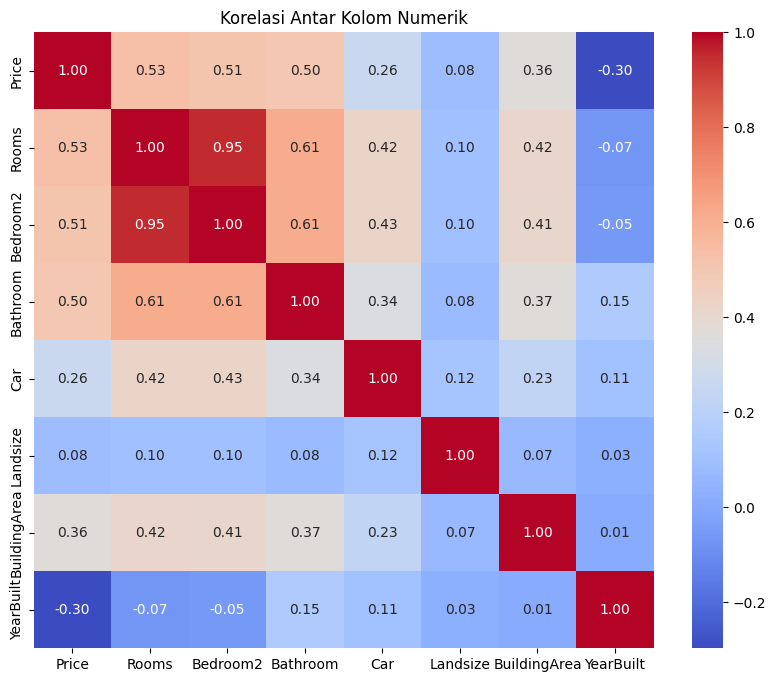

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi Antar Kolom Numerik")
plt.show()

Melakukan visualisasi data dengan heatmap

In [28]:
group_large = df[df['BuildingArea'] > 150]['Price']
group_small = df[df['BuildingArea'] <= 150]['Price']

t_stat, p_value = ttest_ind(group_large, group_small)

print("Nilai t-statistik:", t_stat)
print("Nilai p-value:", p_value)

mean_large = group_large.mean()
mean_small = group_small.mean()

print("Rata-rata Harga di BuildingArea > 150:", mean_large)
print("Rata-rata Harga di BuildingArea <= 150:", mean_small)

Nilai t-statistik: 45.8832647853393
Nilai p-value: 0.0
Rata-rata Harga di BuildingArea > 150: 1545478.6151698465
Rata-rata Harga di BuildingArea <= 150: 832991.9003956248


test Hipotesis dan rata-rata untuk Building Area dan mendapatkan hasil sesuai dengan yang tertera diatas

In [29]:
# test Hipotesis dan rata-rata untuk Car

g_car1= df[df['Car'] > 1]['Price']
g_car2= df[df['Car'] <= 1]['Price']

t_stat, p_value = ttest_ind(g_car1, g_car2)

print("Nilai t-statistik:", t_stat)
print("Nilai p-value:", p_value)

mean_car1 = g_car1.mean()
mean_car2 = g_car2.mean()

print("Rata-rata Harga di Car > 1:", mean_car1)
print("Rata-rata Harga di Car <= 1:", mean_car2)

Nilai t-statistik: 25.9829014907249
Nilai p-value: 1.2345447536317175e-141
Rata-rata Harga di Car > 1: 1281694.2951901918
Rata-rata Harga di Car <= 1: 864787.193568147


test Hipotesis dan rata-rata untuk kolom Car dan mendapatkan hasil sesuai dengan yang tertera diatas

In [30]:
# test Hipotesis dan rata-rata untuk Bathroom

g_Bathroom1 = df[df['Bathroom'] > 2]['Price']
g_Bathroom2 = df[df['Bathroom'] <= 2]['Price']

t_stat, p_value = ttest_ind(g_Bathroom1, g_Bathroom2)

print("Nilai t-statistik:", t_stat)
print("Nilai p-value:", p_value)

mean_Bathroom1 = g_Bathroom1.mean()
mean_Bathroom2 = g_Bathroom2.mean()

print("Rata-rata Harga di Bathroom > 2:", mean_Bathroom1)
print("Rata-rata Harga di Bathroom <= 2:", mean_Bathroom2)

Nilai t-statistik: 35.46112603573434
Nilai p-value: 8.821257636084568e-252
Rata-rata Harga di Bathroom > 2: 1937045.6232876712
Rata-rata Harga di Bathroom <= 2: 984197.3892869328


test Hipotesis dan rata-rata untuk kolom Bathroom dan mendapatkan hasil sesuai dengan yang tertera diatas

In [31]:
# test Hipotesis dan rata-rata untuk Landsize

g_Landsize = df[df['Landsize'] > 1000]['Price']
g_Landsize2 = df[df['Landsize'] <= 1000]['Price']

t_stat, p_value = ttest_ind(g_Landsize, g_Landsize2)

print("Nilai t-statistik:", t_stat)
print("Nilai p-value:", p_value)

mean_Landsize = g_Landsize.mean()
mean_Landsize2 = g_Landsize2.mean()

print("Rata-rata Harga di Landsize > 1000:", mean_Landsize)
print("Rata-rata Harga di Landsize <= 1000:", mean_Landsize2)

Nilai t-statistik: 3.7466085911428877
Nilai p-value: 0.0001808070691388462
Rata-rata Harga di Landsize > 1000: 1218885.6021505375
Rata-rata Harga di Landsize <= 1000: 1063812.3329009244


test Hipotesis dan rata-rata untuk Landsize dan mendapatkan hasil sesuai dengan yang tertera diatas

# Permodelan

In [32]:
X = df[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR_model = LinearRegression()
LR_model.fit(X_train, y_train)
y_pred_LR = LR_model.predict(X_test)

DT_model = DecisionTreeRegressor()
DT_model.fit(X_train, y_train)
y_pred_DT = DT_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_LR))
r2 = r2_score(y_test, y_pred_LR)

print("Linear Regression - RMSE:", rmse)
print("Linear Regression - R2 Score:", r2)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_DT))
r2 = r2_score(y_test, y_pred_DT)

print("Decision Tree - RMSE:", rmse)
print("Decision Tree - R2 Score:", r2)

Linear Regression - RMSE: 550781.2410914198
Linear Regression - R2 Score: 0.42985999399735697
Decision Tree - RMSE: 625150.490475077
Decision Tree - R2 Score: 0.26549900605014154


- Memisahkan data menjadi data latih dan data uji
- Membangun model linear sederhana untuk prediksi harga
- Membanguna model Decision Tree untuk menangkap hubungan non linear
- Dan mengukur performa masing-masing model

# Tahap Lanjutan

Random Forest - RMSE: 490011.35672286485
Random Forest - R2 Score: 0.5487309731763566


Text(0, 0.5, 'Features')

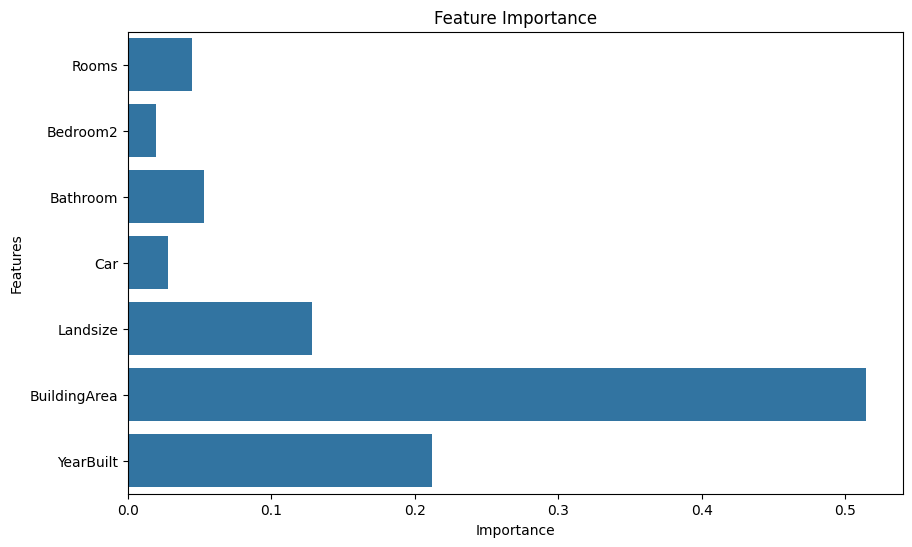

In [33]:
X = df[['Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RF_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
RF_model.fit(X_train, y_train)

y_pred_RF = RF_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_RF))
r2 = r2_score(y_test, y_pred_RF)

print("Random Forest - RMSE:", rmse)
print("Random Forest - R2 Score:", r2)

importance = RF_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importance, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")


- Membangun model ensemble agar lebih akurat dan stabil
- Megetahui fitur yang paling berpengaruh terhadap prediksi harga